In [5]:
import mltools as ml
import data
# from logisticClassify2 import *
import numpy as np

from matplotlib import pyplot as plt
% matplotlib inline

In [2]:
iris = np.genfromtxt('data/iris.txt', delimiter=None)
X, Y = iris[:,0:2], iris[:, -1]
X, Y = ml.shuffleData(X,Y)
X, _ = ml.rescale(X)

XA, YA = X[Y<2,:], Y[Y<2]
XB, YB = X[Y>0,:], Y[Y>0]

Plot decision boundary corredsponding to sign(.5 + 1x_1 - .25x_2) for Dataset A

# Problem 1: Logistic Regression

## Part 1

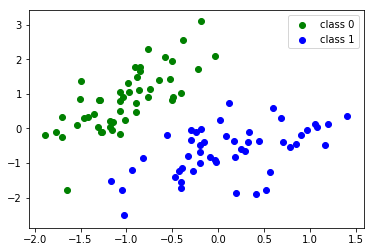

In [34]:
# Plot Dataset A:
XA_0 = XA[YA == 0,:]
XA_1 = XA[YA == 1,:]
plt.scatter(XA_0[:,0], XA_0[:,1], c='green', label='class 0')
plt.scatter(XA_1[:,0], XA_1[:,1], c='blue', label='class 1')
plt.legend()

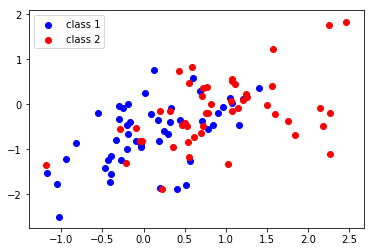

In [33]:
# Plot Dataset B:
XB_1 = XB[YB == 1, :]
XB_2 = XB[YB == 2, :]
plt.scatter(XB_1[:,0], XB_1[:,1], c='blue', label='class 1')
plt.scatter(XB_2[:,0], XB_2[:,1], c='red', label='class 2')
plt.legend()

Clearly, Dataset A is linearly separable and Dataset B is not.

## Part 2

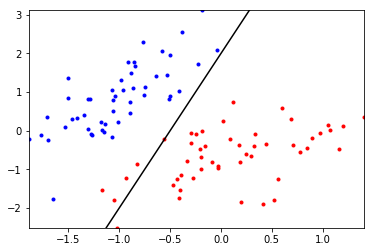

In [20]:
learner = logisticClassify2()
learner.classes = np.unique(YA)
wts = np.array([.5, 1, -.25])
learner.theta = wts
learner.plotBoundary(XA, YA)

Now for Dataset B

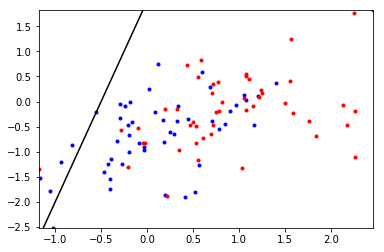

In [22]:
learner.classes = np.unique(YB)
learner.plotBoundary(XB, YB)

## Part 3

Error rate on Dataset A

In [61]:
learner = logisticClassify2()
learner.classes = np.unique(YA)
wts = np.array([.5, 1, -.25])
learner.theta = wts
learner.err(XA, YA)

0.050505050505050504

Error rate on Dataset B

In [62]:
learner.classes = np.unique(YB)
learner.theta = wts
learner.err(XB, YB)

0.46464646464646464

## Part 4

/Users/johnlu/Desktop/uc_irvine/winter2018/cs178/homeworks/hw3/178-hw3-code/mltools/plot.py:42: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  hld = axis.ishold();
/Users/johnlu/Desktop/uc_irvine/winter2018/cs178/homeworks/hw3/178-hw3-code/mltools/plot.py:43: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  axis.hold(True);
/Users/johnlu/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/johnlu/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3

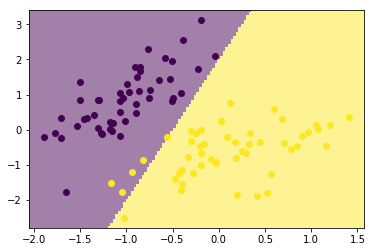

In [63]:
learner.classes = np.unique(YA)
learner.theta = wts
learner.err(XA, YA)

ml.plot.plotClassify2D(learner, XA, YA)

/Users/johnlu/Desktop/uc_irvine/winter2018/cs178/homeworks/hw3/178-hw3-code/mltools/plot.py:42: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  hld = axis.ishold();
/Users/johnlu/Desktop/uc_irvine/winter2018/cs178/homeworks/hw3/178-hw3-code/mltools/plot.py:43: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  axis.hold(True);
/Users/johnlu/anaconda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/johnlu/anaconda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3

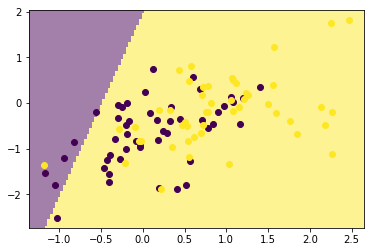

In [64]:
learner.classes = np.unique(YB)
learner.theta = wts
learner.err(XB, YB)

ml.plot.plotClassify2D(learner, XB, YB)

## Part 5

In [57]:
# Fix the required "not implemented" functions for the homework ("TODO")

################################################################################
## LOGISTIC REGRESSION BINARY CLASSIFIER #######################################
################################################################################


class logisticClassify2(ml.classifier):
    """A binary (2-class) logistic regression classifier

    Attributes:
        classes : a list of the possible class labels
        theta   : linear parameters of the classifier
    """

    def __init__(self, *args, **kwargs):
        """
        Constructor for logisticClassify2 object.

        Parameters: Same as "train" function; calls "train" if available

        Properties:
           classes : list of identifiers for each class
           theta   : linear coefficients of the classifier; numpy array
        """
        self.classes = [0,1]              # (default to 0/1; replace during training)
        self.theta = np.array([])         # placeholder value before training

        if len(args) or len(kwargs):      # if we were given optional arguments,
            self.train(*args,**kwargs)    #  just pass them through to "train"


## METHODS ################################################################

    def plotBoundary(self,X,Y):
        """ Plot the (linear) decision boundary of the classifier, along with data """
        if len(self.theta) != 3: raise ValueError('Data & model must be 2D');
        ax = X.min(0),X.max(0); ax = (ax[0][0],ax[1][0],ax[0][1],ax[1][1]);
        ## TODO: find points on decision boundary defined by theta0 + theta1 X1 + theta2 X2 == 0
        x1b = np.array([ax[0],ax[1]]);  # at X1 = points in x1b
        # TODO find x2 values as a function of x1's values
        th0, th1, th2 = self.theta[0], self.theta[1], self.theta[2]
        x2b = (-th0 - th1*x1b) / th2
        ## Now plot the data and the resulting boundary:
        A = Y==self.classes[0]; # and plot it:
        plt.plot(X[A,0],X[A,1],'b.',X[~A,0],X[~A,1],'r.',x1b,x2b,'k-'); plt.axis(ax); plt.draw();

    def predictSoft(self, X):
        """ Return the probability of each class under logistic regression """
        raise NotImplementedError
        ## You do not need to implement this function.
        ## If you *want* to, it should return an Mx2 numpy array "P", with
        ## P[:,1] = probability of class 1 = sigma( theta*X )
        ## P[:,0] = 1 - P[:,1] = probability of class 0
        return P

    def predict(self, X):
        """ Return the predictied class of each data point in X"""
        # raise NotImplementedError
        ## TODO: compute linear response r[i] = theta0 + theta1 X[i,1] + theta2 X[i,2] + ... for each i
        ## TODO: if z[i] > 0, predict class 1:  Yhat[i] = self.classes[1]
        ##       else predict class 0:  Yhat[i] = self.classes[0]
        Z = self.theta[0] + X.dot(self.theta[1:])
        Yhat = self.classes[(Z > 0).astype(int)]
        return Yhat


    def train(self, X, Y, initStep=1.0, stopTol=1e-4, stopEpochs=5000, plot=None):
        """ Train the logistic regression using stochastic gradient descent """
        M,N = X.shape;                     # initialize the model if necessary:
        self.classes = np.unique(Y);       # Y may have two classes, any values
        XX = np.hstack((np.ones((M,1)),X)) # XX is X, but with an extra column of ones
        YY = ml.toIndex(Y,self.classes);   # YY is Y, but with canonical values 0 or 1
        if len(self.theta)!=N+1: self.theta=np.random.rand(N+1);
        # init loop variables:
        epoch=0; done=False; Jnll=[]; J01=[];
        while not done:
            stepsize, epoch = initStep*2.0/(2.0+epoch), epoch+1; # update stepsize
            # Do an SGD pass through the entire data set:
            for i in np.random.permutation(M):
                ri    = NotImplementedError;     # TODO: compute linear response r(x)
                gradi = NotImplementedError;     # TODO: compute gradient of NLL loss
                self.theta -= stepsize * gradi;  # take a gradient step

            J01.append( self.err(X,Y) )  # evaluate the current error rate

            ## TODO: compute surrogate loss (logistic negative log-likelihood)
            ##  Jsur = sum_i [ (log si) if yi==1 else (log(1-si)) ]
            Jnll.append( NotImplementedError ) # TODO evaluate the current NLL loss
            plt.figure(1); plt.plot(Jnll,'b-',J01,'r-'); plt.draw();    # plot losses
            if N==2: plt.figure(2); self.plotBoundary(X,Y); plt.draw(); # & predictor if 2D
            plt.pause(.01);                    # let OS draw the plot

            ## For debugging: you may want to print current parameters & losses
            # print self.theta, ' => ', Jnll[-1], ' / ', J01[-1]
            # raw_input()   # pause for keystroke

            # TODO check stopping criteria: exit if exceeded # of epochs ( > stopEpochs)
            done = NotImplementedError;   # or if Jnll not changing between epochs ( < stopTol )


################################################################################
################################################################################
################################################################################